In [15]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np

In [16]:
weblogs = pd.read_csv('weblogs.csv') 

In [17]:
weblogs.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,0LSowGoBCue8G08Ed23t,54,36,0.679245,3.407946,0.000000,1.0,0.0,0.0,0.0,...,3,0.000000,0.796296,190220.0,14.370370,0.037736,0.188679,34,0,0
1,Q7SqwGoBCue8G08ErZKQ,1,0,0.000000,NaN,0.000000,1.0,0.0,0.0,0.0,...,0,0.000000,1.000000,341.0,5.000000,NaN,NaN,0,0,1
2,RrSqwGoBCue8G08ErZKQ,109,323,2.990741,9.373421,0.009174,1.0,0.0,0.0,0.0,...,6,0.302049,0.678899,224945.0,14.036697,0.120370,0.314815,22,1,0
3,IbSowGoBCue8G08ECmHa,144,703,4.916084,34.832970,0.006944,1.0,0.0,0.0,0.0,...,6,1.142439,0.645833,413196.0,11.034722,0.195804,0.258741,48,0,0
4,R7SqwGoBCue8G08ErZKQ,38,501,13.540541,51.599600,0.078947,1.0,0.0,0.0,0.0,...,6,0.486664,0.736842,86481.0,14.000000,0.216216,0.216216,22,1,0


In [18]:
weblogs.describe()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,GET_METHOD,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
count,60352.000000,6.035200e+04,60352.000000,47566.000000,60352.000000,60352.000000,60352.000000,60352.000000,60352.000000,60352.000000,...,60352.000000,60352.000000,60352.000000,6.035200e+04,6.035200e+04,47566.000000,47566.000000,60352.000000,60352.000000,60352.000000
mean,60.016222,7.092841e+02,32.876883,40.269045,0.041537,0.979845,0.008060,0.010824,0.001271,0.993008,...,4.853609,0.685015,0.359889,3.154066e+05,1.240174e+06,0.261015,0.385256,14.761764,1.588580,0.195636
std,165.812155,7.564321e+03,148.526271,89.886092,0.078903,0.111031,0.057656,0.091345,0.027617,0.053862,...,1.486740,0.598435,0.279836,1.855146e+06,4.115582e+07,0.243519,0.248136,19.616342,5.923877,0.396692
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000e+00,0.081633,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.000000,0.000000,0.000000,9.901000e+03,7.163147e+00,0.094782,0.244444,0.000000,0.000000,0.000000
50%,22.000000,3.800000e+01,1.500000,6.469593,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,0.781736,0.382353,9.526050e+04,1.072361e+01,0.200000,0.338983,2.000000,0.000000,0.000000
75%,64.000000,3.610000e+02,6.674051,31.697288,0.052419,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,1.224940,0.580645,2.705718e+05,1.300000e+01,0.340909,0.500000,28.000000,1.000000,0.000000
max,15265.000000,1.168297e+06,1800.000000,893.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,4.242641,1.000000,1.690000e+08,2.150000e+09,1.000000,1.000000,243.000000,723.000000,1.000000


In [19]:
weblogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60352 entries, 0 to 60351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  60352 non-null  object 
 1   NUMBER_OF_REQUESTS  60352 non-null  int64  
 2   TOTAL_DURATION      60352 non-null  int64  
 3   AVERAGE_TIME        60352 non-null  float64
 4   STANDARD_DEVIATION  47566 non-null  float64
 5   REPEATED_REQUESTS   60352 non-null  float64
 6   HTTP_RESPONSE_2XX   60352 non-null  float64
 7   HTTP_RESPONSE_3XX   60352 non-null  float64
 8   HTTP_RESPONSE_4XX   60352 non-null  float64
 9   HTTP_RESPONSE_5XX   60352 non-null  float64
 10  GET_METHOD          60352 non-null  float64
 11  POST_METHOD         60352 non-null  float64
 12  HEAD_METHOD         60352 non-null  float64
 13  OTHER_METHOD        60352 non-null  float64
 14  NIGHT               60352 non-null  float64
 15  UNASSIGNED          60352 non-null  float64
 16  IMAG

In [20]:
weblogs.duplicated().sum()

33

In [21]:
weblogs = weblogs.drop('ID', axis=1)

In [22]:
for name, col in enumerate(weblogs.columns):
    print(name, weblogs.columns[name] ,weblogs[col].nunique())

0 NUMBER_OF_REQUESTS 944
1 TOTAL_DURATION 4719
2 AVERAGE_TIME 22201
3 STANDARD_DEVIATION 34935
4 REPEATED_REQUESTS 4625
5 HTTP_RESPONSE_2XX 1731
6 HTTP_RESPONSE_3XX 1381
7 HTTP_RESPONSE_4XX 663
8 HTTP_RESPONSE_5XX 417
9 GET_METHOD 1569
10 POST_METHOD 1565
11 HEAD_METHOD 16
12 OTHER_METHOD 7
13 NIGHT 351
14 UNASSIGNED 2254
15 IMAGES 7635
16 TOTAL_HTML 5304
17 HTML_TO_IMAGE 3968
18 HTML_TO_CSS 689
19 HTML_TO_JS 1017
20 WIDTH 815
21 DEPTH 9
22 STD_DEPTH 16123
23 CONSECUTIVE 6821
24 DATA 44216
25 PPI 16990
26 SF_REFERRER 5612
27 SF_FILETYPE 6113
28 MAX_BARRAGE 167
29 PENALTY 94
30 ROBOT 2


In [23]:
weblogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60352 entries, 0 to 60351
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUMBER_OF_REQUESTS  60352 non-null  int64  
 1   TOTAL_DURATION      60352 non-null  int64  
 2   AVERAGE_TIME        60352 non-null  float64
 3   STANDARD_DEVIATION  47566 non-null  float64
 4   REPEATED_REQUESTS   60352 non-null  float64
 5   HTTP_RESPONSE_2XX   60352 non-null  float64
 6   HTTP_RESPONSE_3XX   60352 non-null  float64
 7   HTTP_RESPONSE_4XX   60352 non-null  float64
 8   HTTP_RESPONSE_5XX   60352 non-null  float64
 9   GET_METHOD          60352 non-null  float64
 10  POST_METHOD         60352 non-null  float64
 11  HEAD_METHOD         60352 non-null  float64
 12  OTHER_METHOD        60352 non-null  float64
 13  NIGHT               60352 non-null  float64
 14  UNASSIGNED          60352 non-null  float64
 15  IMAGES              60352 non-null  float64
 16  TOTA

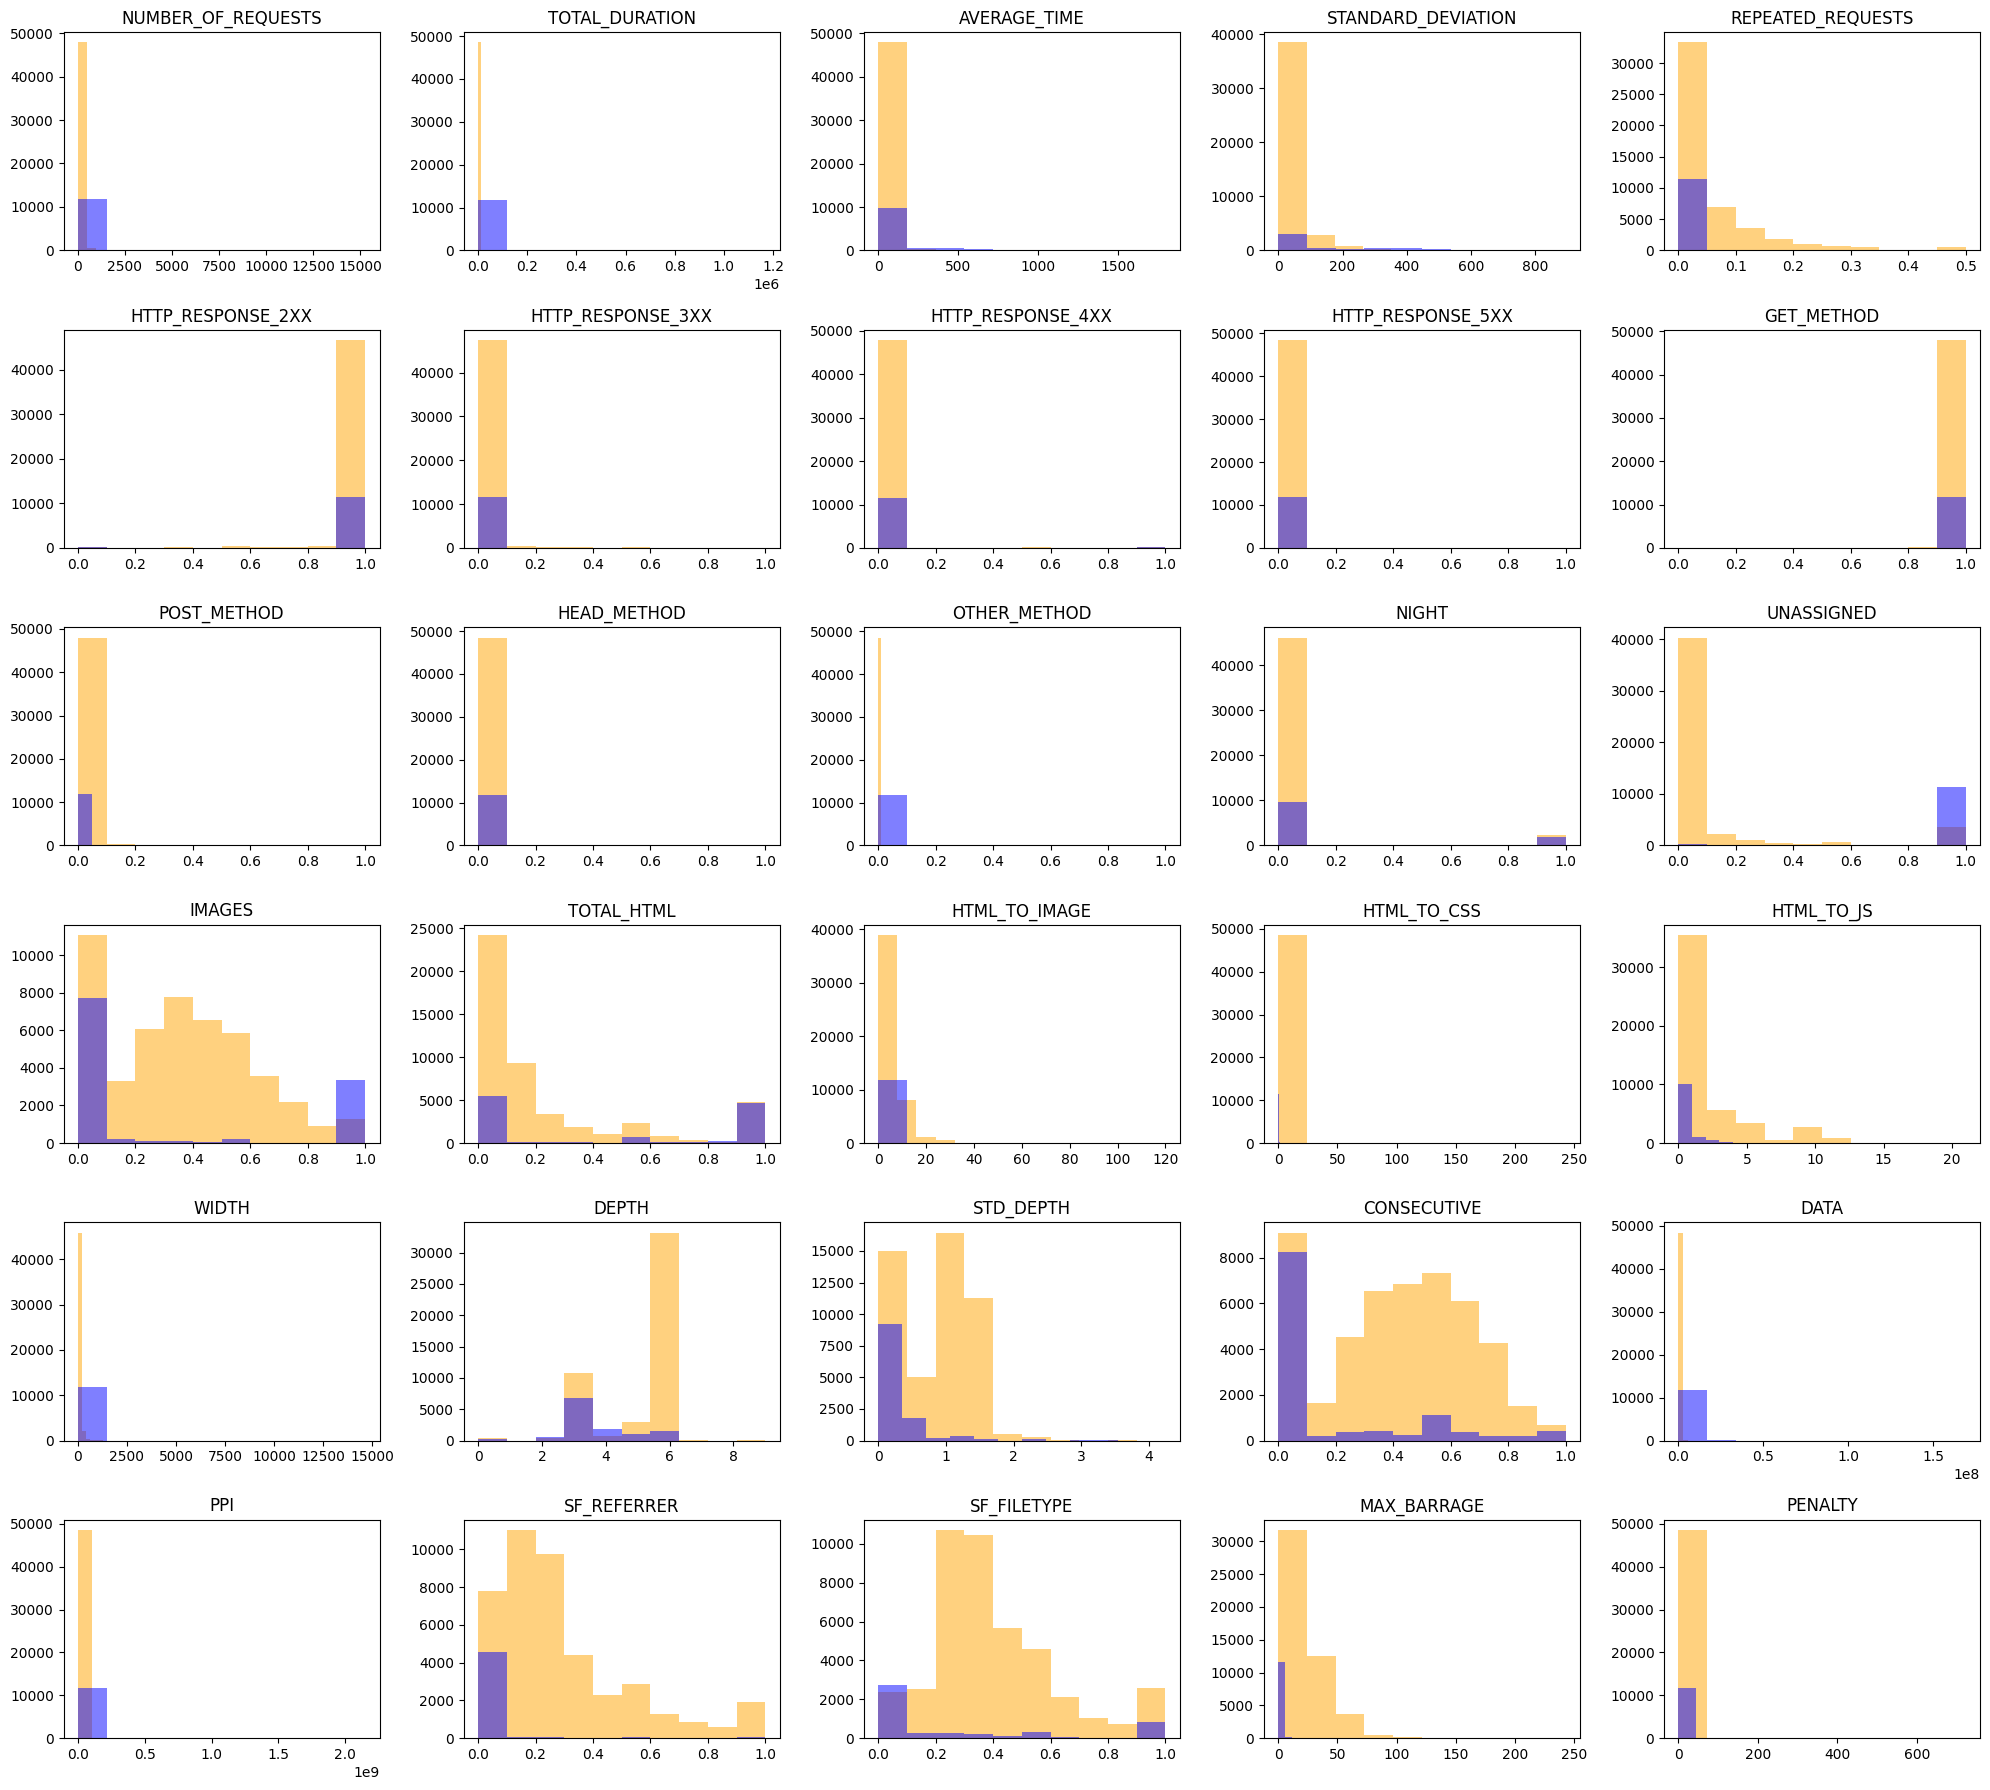

In [24]:
df_robot_0 = weblogs[weblogs['ROBOT'] == 0]
df_robot_1 = weblogs[weblogs['ROBOT'] == 1]

num_rows = 6
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 18))
axs = axs.ravel()
for i, col in enumerate(weblogs.columns):
    if col == 'ROBOT':
        continue
    axs[i].hist(df_robot_0[col], alpha=0.5, label='ROBOT 0', color='orange')
    axs[i].hist(df_robot_1[col], alpha=0.5, label='ROBOT 1', color='blue')
    axs[i].set_title(col)
    


plt.tight_layout()
plt.show()

In [25]:
weblogs = weblogs.drop_duplicates()
#weblogs = weblogs.drop('HTTP_RESPONSE_2XX', axis=1)
#weblogs = weblogs.drop('HTTP_RESPONSE_3XX', axis=1)
#weblogs = weblogs.drop('HTTP_RESPONSE_4XX', axis=1)
weblogs = weblogs.drop('HTTP_RESPONSE_5XX', axis=1)
weblogs = weblogs.drop('GET_METHOD', axis=1)
weblogs = weblogs.drop('HEAD_METHOD', axis=1)
weblogs = weblogs.drop('OTHER_METHOD', axis=1)
weblogs = weblogs.drop('PPI', axis=1)

In [26]:
weblogs[weblogs.isnull().any(axis=1)].head()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,POST_METHOD,NIGHT,...,WIDTH,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
1,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0.0,1.0,341.0,NaN,NaN,0,0,1
5,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,0.0,0.0,7428.0,NaN,NaN,0,0,1
6,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,0.0,0.0,7879.0,NaN,NaN,0,0,0
16,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,0.0,0.0,3536.0,NaN,NaN,0,0,0
33,1,0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,0.0,0.0,1548.0,NaN,NaN,0,0,1


In [27]:
median = weblogs["STANDARD_DEVIATION"].median()
weblogs["STANDARD_DEVIATION"].fillna(median, inplace=True)

In [28]:
median = weblogs["SF_FILETYPE"].median()
weblogs["SF_FILETYPE"].fillna(median, inplace=True)

In [29]:
median = weblogs["SF_REFERRER"].median()
weblogs["SF_REFERRER"].fillna(median, inplace=True)

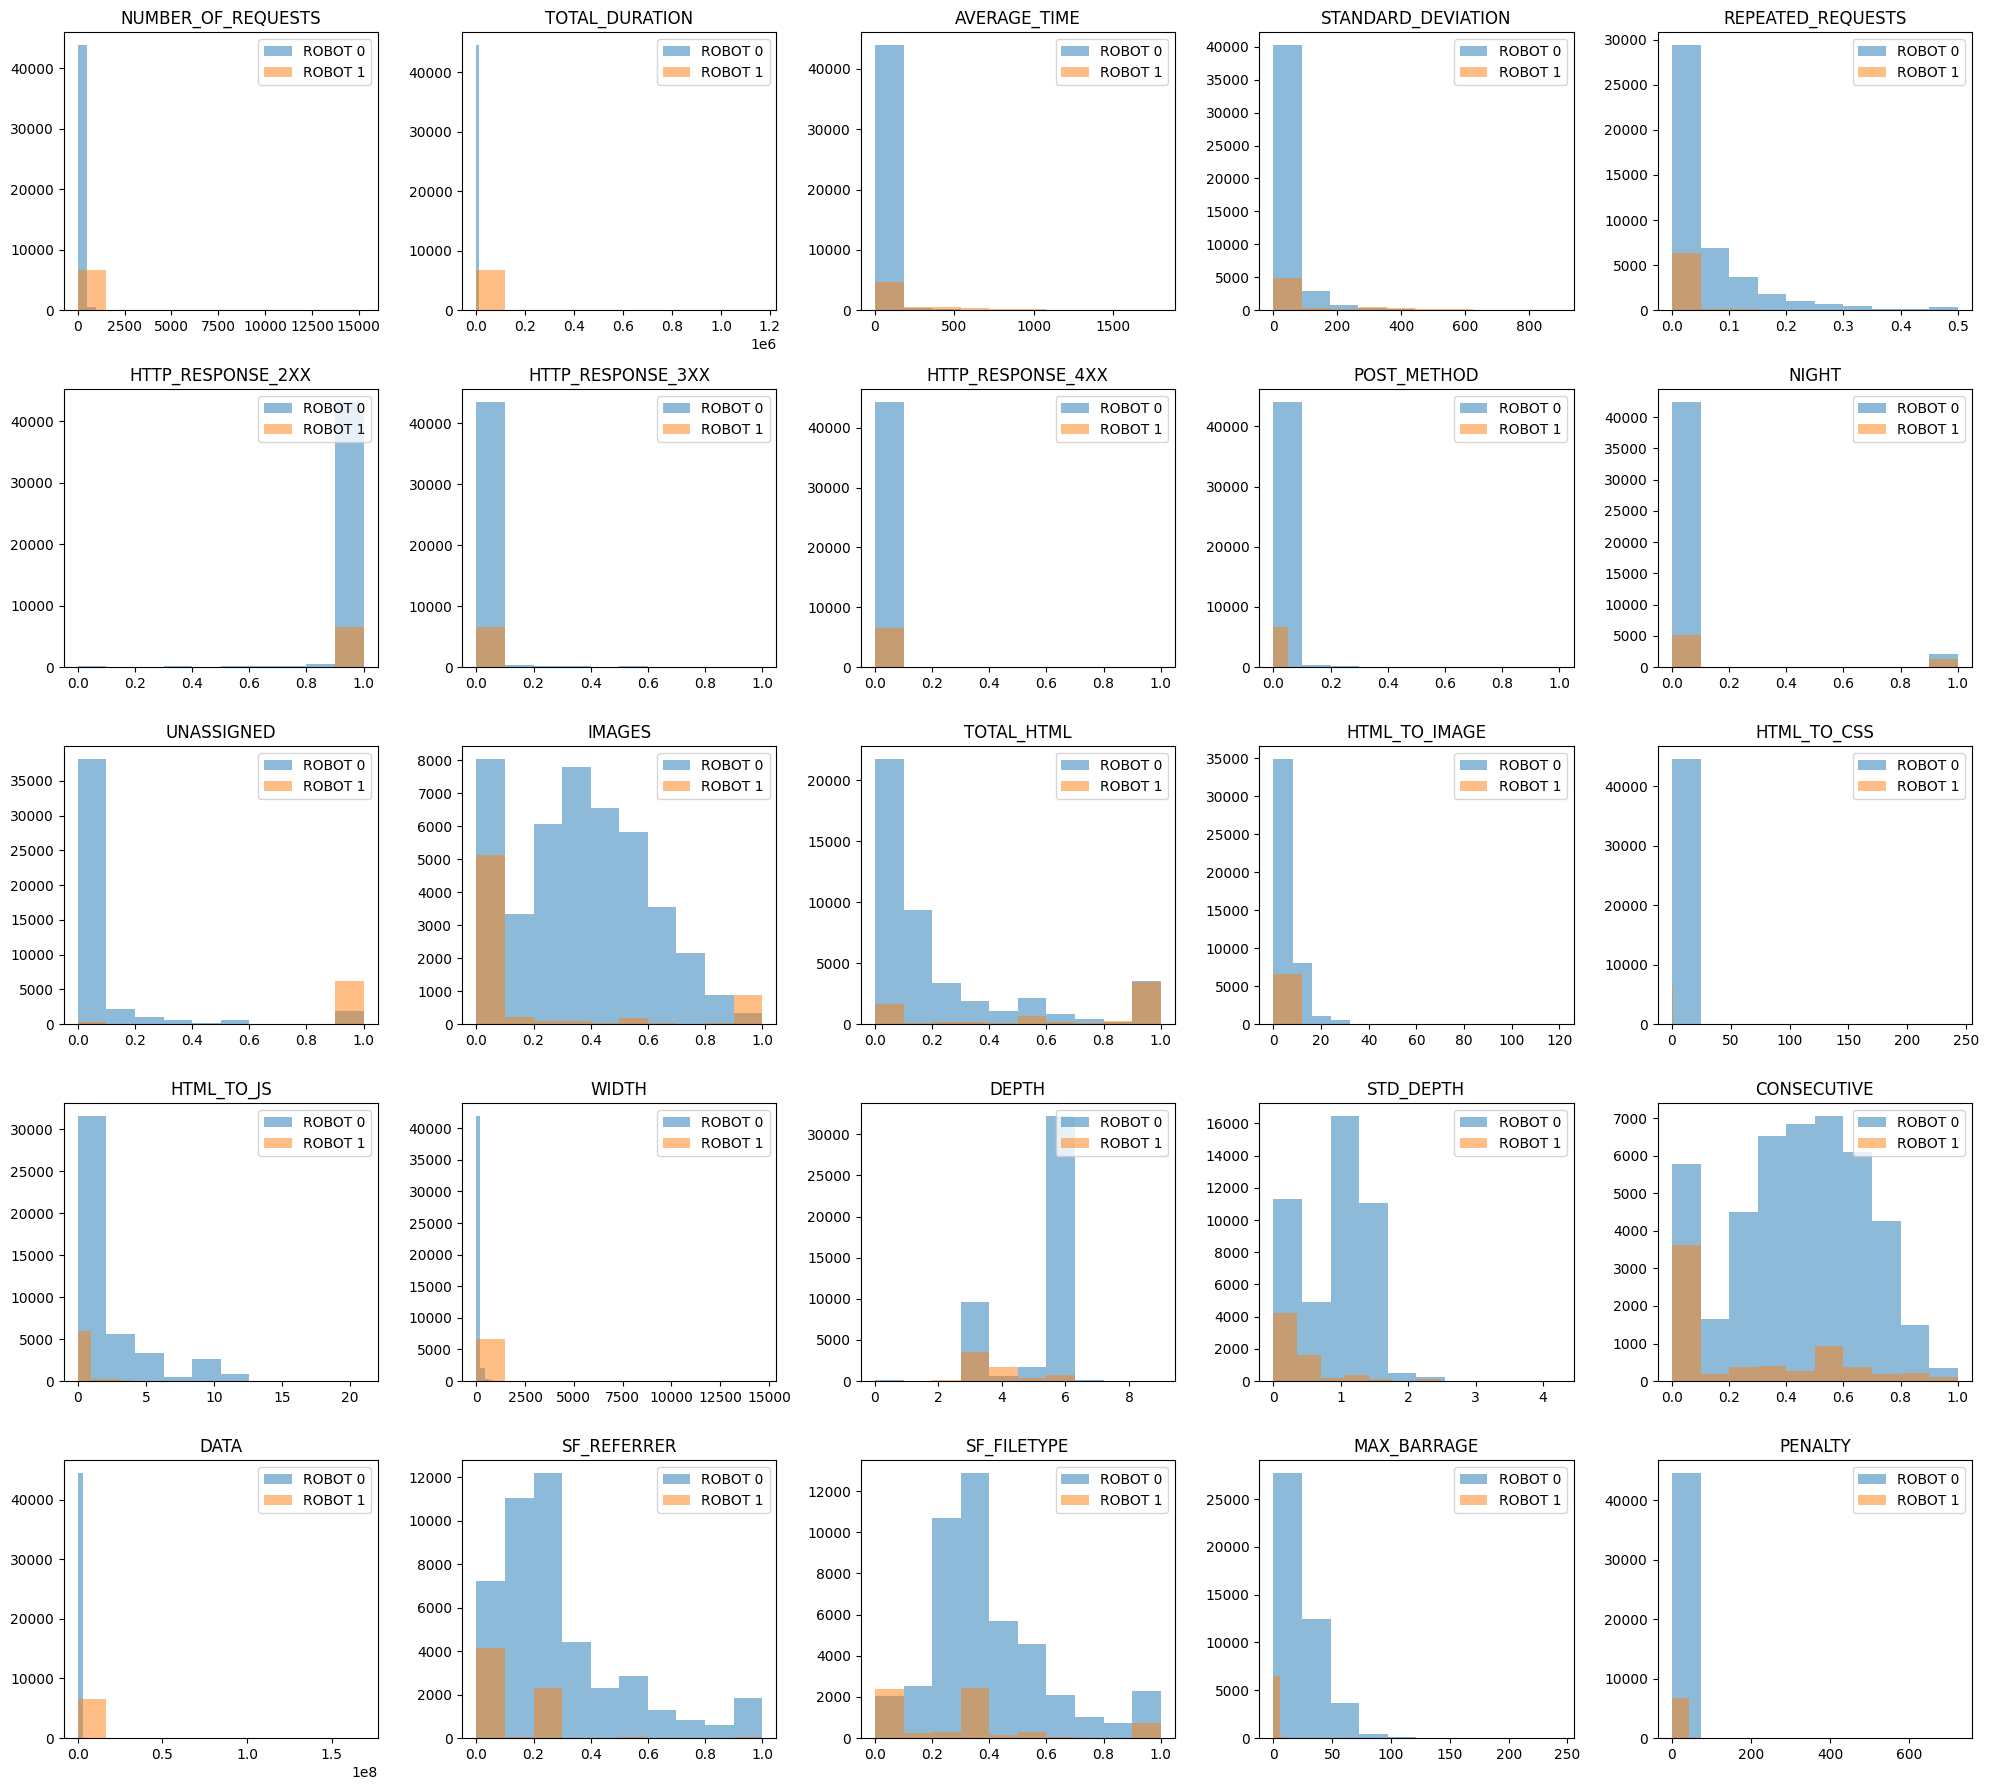

In [30]:
df_robot_0 = weblogs[weblogs['ROBOT'] == 0]
df_robot_1 = weblogs[weblogs['ROBOT'] == 1]

num_rows = 5
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 18))
axs = axs.ravel()
for i, col in enumerate(weblogs.columns):
    if col == 'ROBOT':
        continue
    axs[i].hist(df_robot_0[col], alpha=0.5, label='ROBOT 0')
    axs[i].hist(df_robot_1[col], alpha=0.5, label='ROBOT 1')
    axs[i].set_title(col)
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [31]:
weblogs.head()

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,POST_METHOD,NIGHT,...,WIDTH,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,54,36,0.679245,3.407946,0.000000,1.0,0.0,0.0,0.000000,0.0,...,54,3,0.000000,0.796296,190220.0,0.037736,0.188679,34,0,0
1,1,0,0.000000,6.828706,0.000000,1.0,0.0,0.0,0.000000,0.0,...,0,0,0.000000,1.000000,341.0,0.205128,0.340659,0,0,1
2,109,323,2.990741,9.373421,0.009174,1.0,0.0,0.0,0.009174,0.0,...,107,6,0.302049,0.678899,224945.0,0.120370,0.314815,22,1,0
3,144,703,4.916084,34.832970,0.006944,1.0,0.0,0.0,0.000000,0.0,...,143,6,1.142439,0.645833,413196.0,0.195804,0.258741,48,0,0
4,38,501,13.540541,51.599600,0.078947,1.0,0.0,0.0,0.000000,0.0,...,35,6,0.486664,0.736842,86481.0,0.216216,0.216216,22,1,0


In [32]:
X = weblogs.iloc[:, :-1].values  
y = weblogs.iloc[:, -1].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [34]:
models = []    
models.append(('Logistic Regression', LogisticRegression(max_iter=1000)))    
models.append(('K Nearest Neighbors', KNeighborsClassifier()))    
models.append(('Support Vector Machine', SVC()))    
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('HistGradientBoostingClassifier', HistGradientBoostingClassifier()))

Accuracy score of Logistic Regression is: 0.9134067306941517


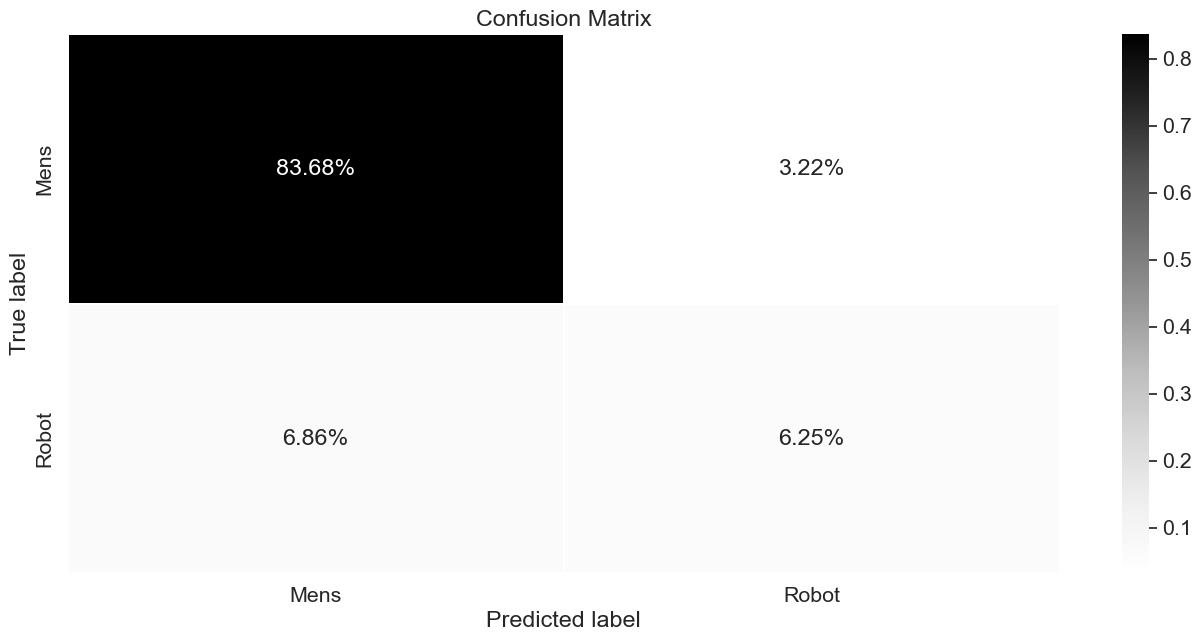

Accuracy score of K Nearest Neighbors is: 0.9068478175997501


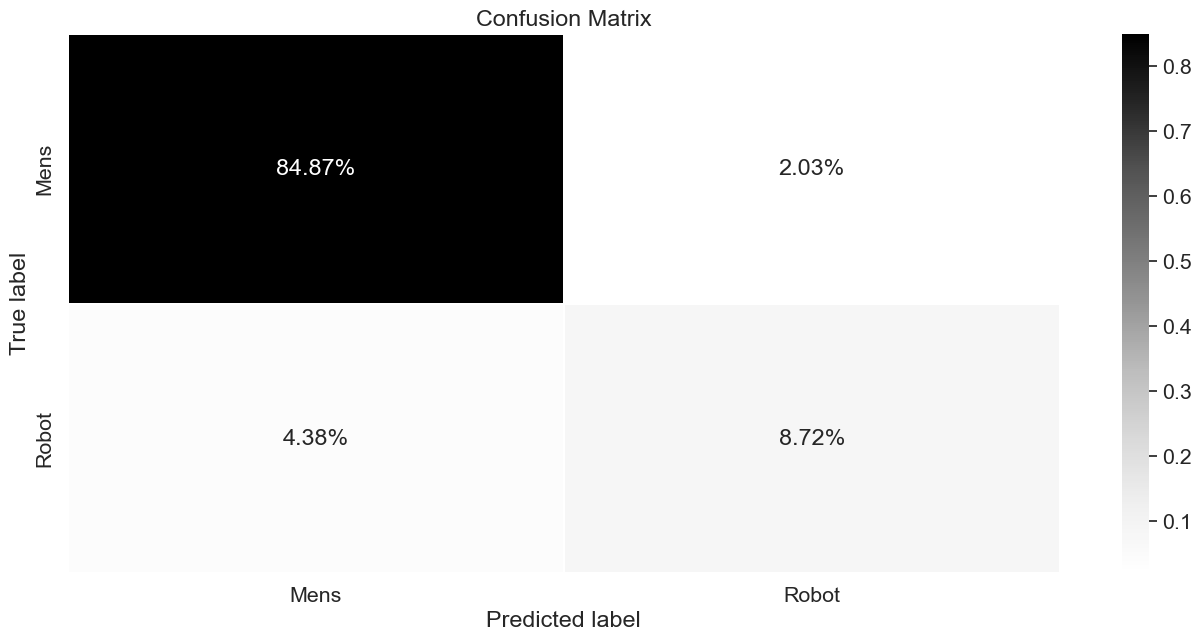

In [35]:
from sklearn.model_selection import learning_curve

for name, model in models:     
    model.fit(X_train, y_train)     
    predictions = model.predict(X_test) 
    print("Accuracy score of {} is: {}".format(name, accuracy_score(y_test, predictions)))

    model.fit(X, y)
    predictions = model.predict(X_test)
    matrix = confusion_matrix(y_test, predictions)
        
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    labels = ['Mens', 'Robot']
    sns.heatmap(matrix/np.sum(matrix), cmap=plt.cm.Greys, linewidths=0.2, annot=True,fmt='.2%', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
    ''''
    train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=5,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1],
    scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.ylim((0.0, 1.01))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

    plt.legend(loc='best')
    plt.show()
    '''

In [ ]:
param_grid = {
    'max_iter': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 1, 10],
    'max_depth': [3, 5, 7, 9 ]
}
grid = GridSearchCV(
    HistGradientBoostingClassifier(random_state=1),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}


In [ ]:
#model = HistGradientBoostingClassifier(max_iter=200, learning_rate=0.1, max_depth=5, random_state=1)
model = RandomForestClassifier()
model.fit(X, y)
predictions = model.predict(X_test)
print(predictions)

[1 0 0 ... 0 0 0]


In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

probability = model.predict_proba([X_test[1]]) * 100

print('Zekerheid Mens:',format(probability[0][0], ".2f"), '%')
print('Zekerheid Robot:',format(probability[0][1], ".2f"), '%')

Accuracy: 0.9847548124209639
Zekerheid Mens: 99.86 %
Zekerheid Robot: 0.14 %


In [ ]:
matrix = confusion_matrix(y_test, predictions)

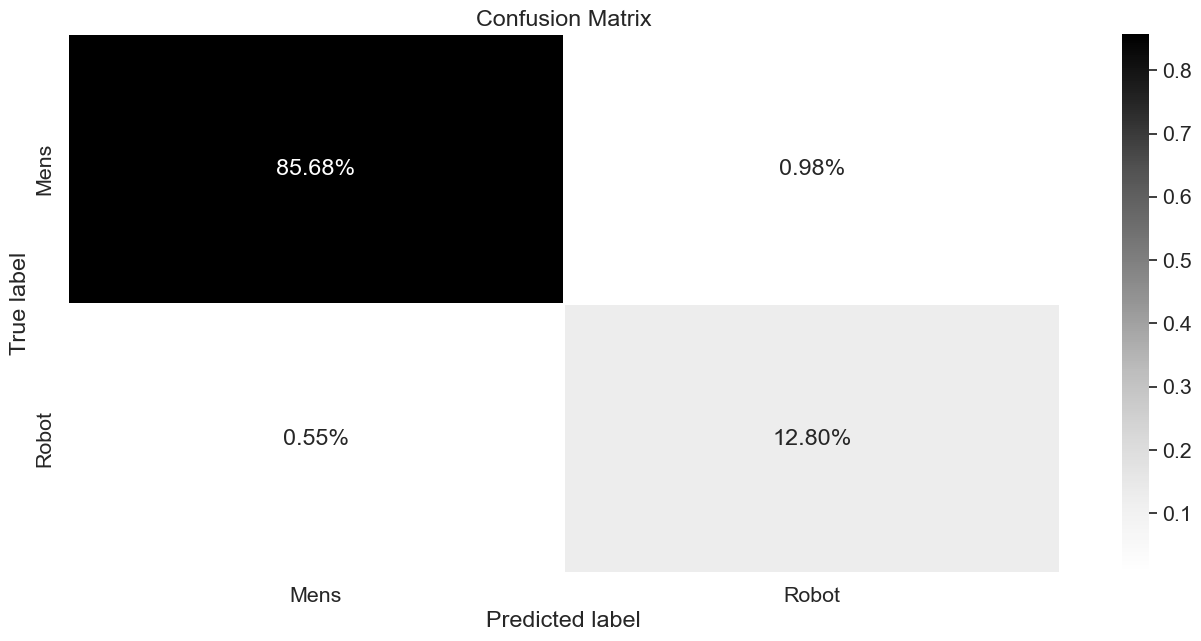

In [ ]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
labels = ['Mens', 'Robot']
sns.heatmap(matrix/np.sum(matrix), cmap=plt.cm.Greys, linewidths=0.2, annot=True,fmt='.2%', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()